<a href="https://colab.research.google.com/github/AhmedHamadaIT/Car_price_machine/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
from IPython.display import Image
Image(url= "https://th.bing.com/th/id/R.78e8a1b7448b01564bb6cbd44f176c2d?rik=l1rJcDqjjqf4rg&riu=http%3a%2f%2fredcrosschat.org%2fwp-content%2fuploads%2f2012%2f04%2ftitanic-movie-wallpapers-images-picture-photo-1.jpg&ehk=vdJnB28dWkcKAl29Jx44GISbaksruaGoewhfjX3csVo%3d&risl=&pid=ImgRaw&r=0")


#Import and depending

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score

Data Collection & Processing

In [236]:
#load data
Titanic_data = pd.read_csv('/content/tested.csv')

In [237]:
# printing the first 5 rows of the dataframe

Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [238]:
#num of row and column
Titanic_data.shape

(413, 12)

In [239]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  413 non-null    int64  
 1   Survived     413 non-null    int64  
 2   Pclass       413 non-null    int64  
 3   Name         413 non-null    object 
 4   Sex          413 non-null    object 
 5   Age          328 non-null    float64
 6   SibSp        413 non-null    int64  
 7   Parch        413 non-null    int64  
 8   Ticket       413 non-null    object 
 9   Fare         412 non-null    float64
 10  Cabin        89 non-null     object 
 11  Embarked     413 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 38.8+ KB


In [240]:
# check the number of missing values in each column
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             85
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          324
Embarked         0
dtype: int64

Handling missing value

In [241]:
# replacing the missing values in "Age" column with mean value
Titanic_data['Age'].fillna(Titanic_data['Age'].mean(), inplace=True)

In [242]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  413 non-null    int64  
 1   Survived     413 non-null    int64  
 2   Pclass       413 non-null    int64  
 3   Name         413 non-null    object 
 4   Sex          413 non-null    object 
 5   Age          413 non-null    float64
 6   SibSp        413 non-null    int64  
 7   Parch        413 non-null    int64  
 8   Ticket       413 non-null    object 
 9   Fare         412 non-null    float64
 10  Cabin        89 non-null     object 
 11  Embarked     413 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 38.8+ KB


In [243]:
# finding the mode value of "Embarked" column
print(Titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [244]:
print(Titanic_data['Embarked'].mode()[0])

S


In [245]:
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          324
Embarked         0
dtype: int64

#Data Analysis

In [246]:
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,412.000000
mean,1102.358354,0.365617,2.263923,30.342988,0.435835,0.389831,35.274970
std,120.344741,0.482187,0.842201,12.666215,0.875156,0.983156,55.071904
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1000.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1103.000000,0.000000,3.000000,30.342988,0.000000,0.000000,14.454200
75%,1206.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [247]:
# finding the number of people survived and not survived
Titanic_data["Survived"].value_counts()

0    262
1    151
Name: Survived, dtype: int64

In [271]:
Embarked = Titanic_data['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> 2
-> 0
-> 1


Data Visualization

In [248]:
sns.set()

In [249]:
sns.set(style = "dark", font = "Times New Roman")


[]

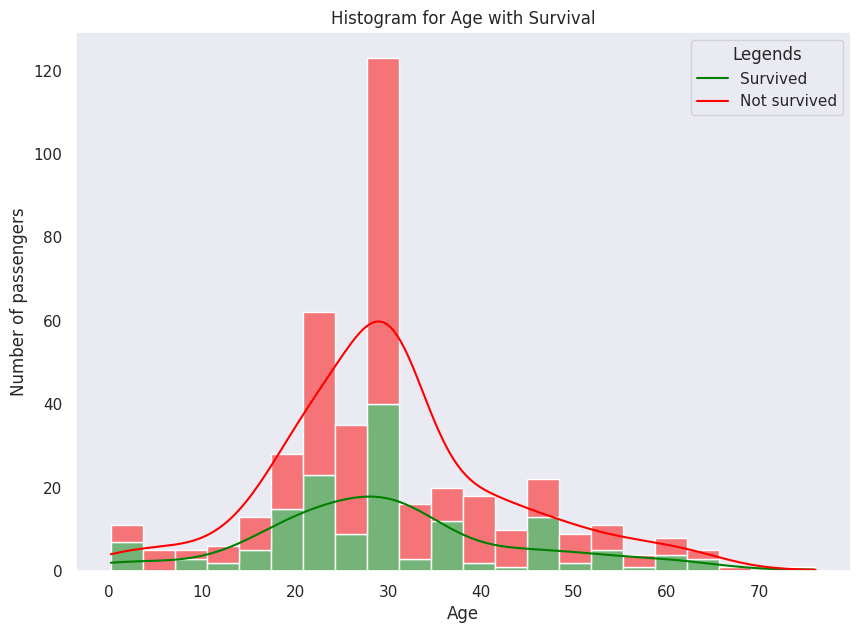

In [250]:
_, ax = mpl.subplots(figsize = (10, 7))
sns.histplot(data = Titanic_data, x = "Age", hue = "Survived", multiple = "stack", kde = True, palette=["red", "green"], ax = ax)
ax.set_title("Histogram for Age with Survival")
ax.set_xlabel("Age")
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Survived", "Not survived"])
mpl.plot()

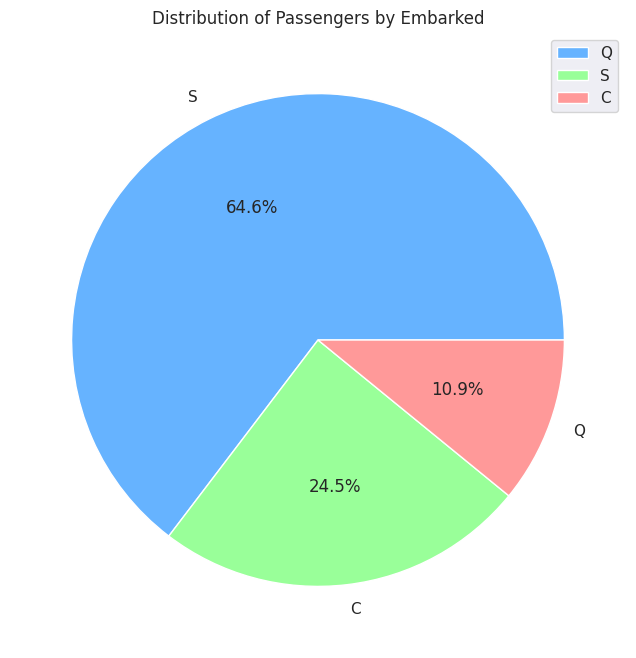

In [251]:
embarked_counts = Titanic_data['Embarked'].value_counts()
mpl.figure(figsize=(8, 8))
mpl.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ff9999'])
mpl.title("Distribution of Passengers by Embarked")
mpl.legend(["Q", "S", "C"])
mpl.show()

<Axes: xlabel='Survived', ylabel='count'>

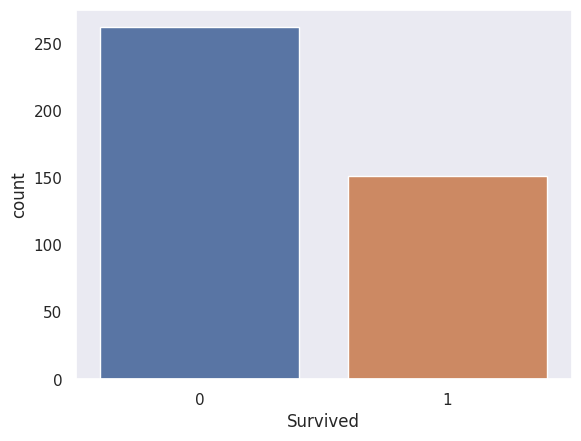

In [252]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=Titanic_data)


In [253]:
#count num of male and female
Titanic_data['Sex'].value_counts()

male      262
female    151
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

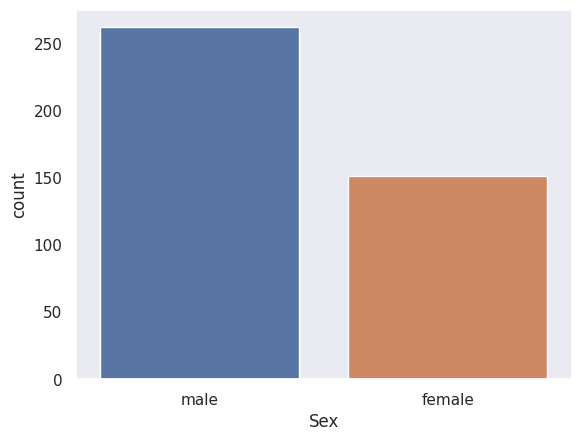

In [254]:
# making a count plot for "SEX" column
sns.countplot(x='Sex', data=Titanic_data)


<Axes: xlabel='Sex', ylabel='count'>

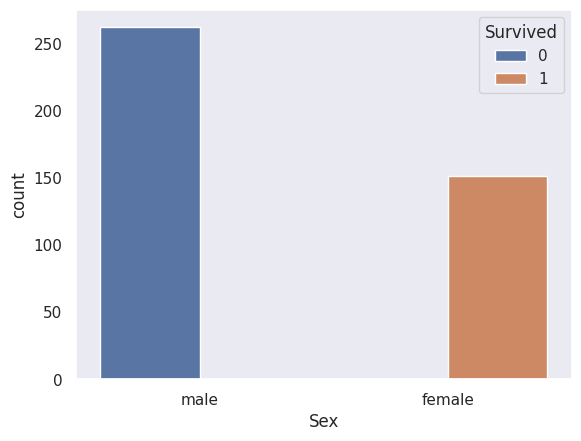

In [255]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=Titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

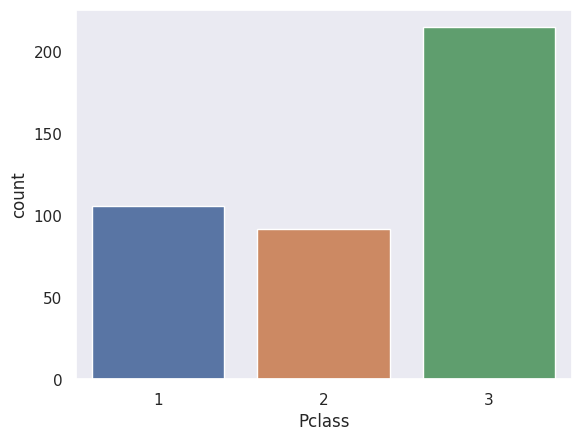

In [256]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=Titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

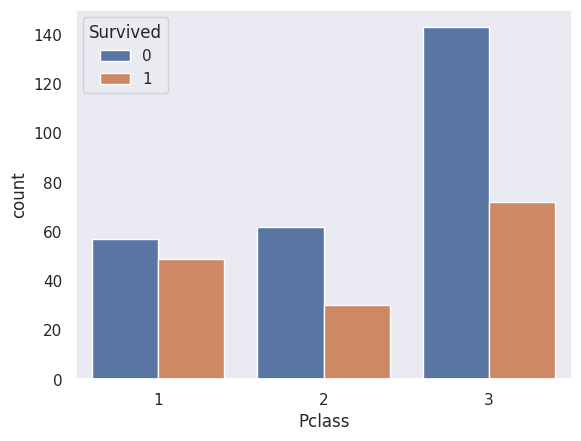

In [257]:
sns.countplot(x='Pclass', hue='Survived', data=Titanic_data)

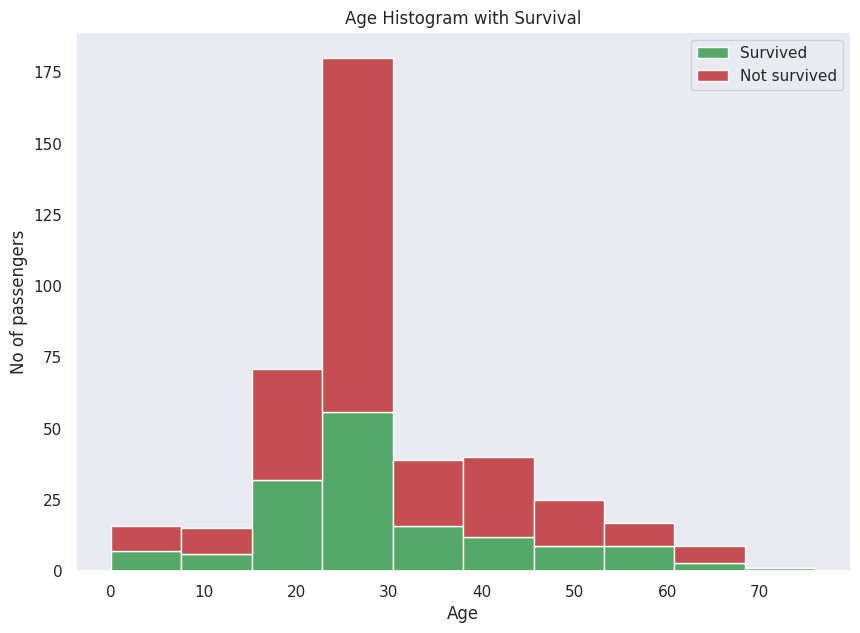

In [285]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [Titanic_data[Titanic_data['Survived']==1]['Age'], Titanic_data[Titanic_data['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()


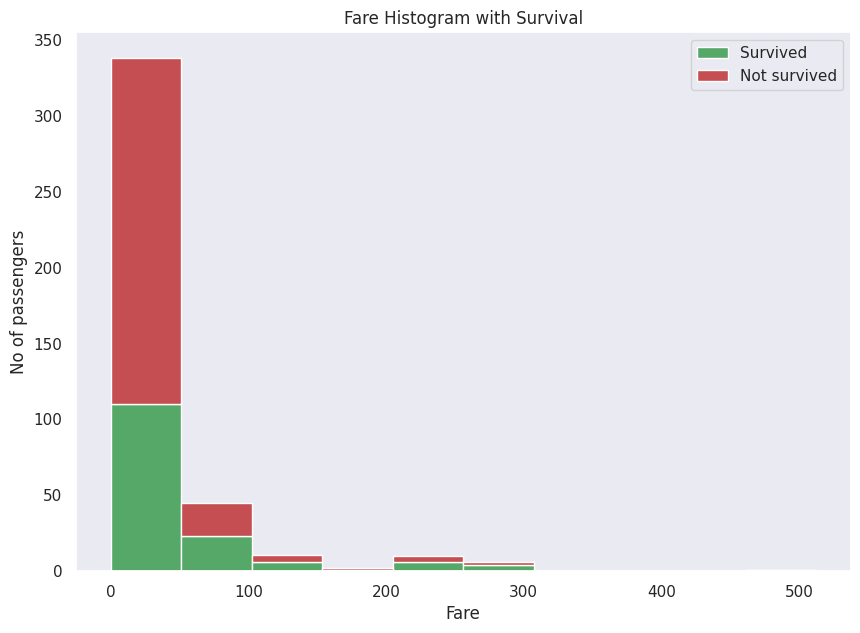

In [286]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [Titanic_data[Titanic_data['Survived']==1]['Fare'], Titanic_data[Titanic_data['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()


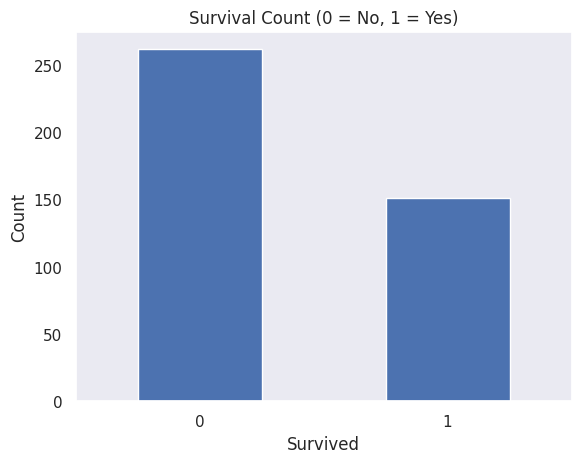

In [287]:
column = 'Survived'

# Create a bar chart
survival_counts = Titanic_data[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
plt.show()

#Separating features & Target

In [258]:
Titanic_data['Sex'].value_counts()

male      262
female    151
Name: Sex, dtype: int64

In [259]:
Titanic_data['Embarked'].value_counts()

S    267
C    101
Q     45
Name: Embarked, dtype: int64

In [274]:
# converting categorical Columns
Titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [277]:
Titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [281]:
Titanic_data['Age'] = Titanic_data['Age'].astype(int)
Titanic_data['Fare'] = Titanic_data['Fare'].fillna(0)
Titanic_data['Fare'] = Titanic_data['Fare'].astype(int)



In [282]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7,NaN,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7,NaN,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9,NaN,2
3,895,0,3,"Wirz, Mr. Albert",0,27,0,0,315154,8,NaN,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12,NaN,0


In [283]:
data = Titanic_data.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)


In [284]:
Titanic_data.head

<bound method NDFrame.head of      Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0           0       3    0   34      0      0     7         2
1           1       3    1   47      1      0     7         0
2           0       2    0   62      0      0     9         2
3           0       3    0   27      0      0     8         0
4           1       3    1   22      1      1    12         0
..        ...     ...  ...  ...    ...    ...   ...       ...
408         0       3    0   30      0      0     8         0
409         1       1    1   39      0      0   108         1
410         0       3    0   38      0      0     7         0
411         0       3    0   30      0      0     8         0
412         0       3    0   30      1      1    22         1

[413 rows x 8 columns]>

0      0
1      1
2      0
3      0
4      1
      ..
408    0
409    1
410    0
411    0
412    0
Name: Survived, Length: 413, dtype: int64


In [288]:
Train = Titanic_data.drop(['Survived'], axis=1)
Test = Titanic_data.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

In [289]:
print(X.shape, X_train.shape, X_test.shape)

(413, 8) (330, 8) (83, 8)


##Model Training

Logistic Regression

In [267]:
try:
  float("E52")
except ValueError:
  print("The string 'E52' cannot be converted to a float.")

The string 'E52' cannot be converted to a float.


In [290]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 96.39%
